Loading data

In [1]:
import pandas as pd

data = pd.read_csv('/home/adam/Datasets/CarPrice.csv')

Checking amount of samples, features, datatypes etc.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Checking for null values

In [3]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Looking at data itself

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Getting rid of names of cars because almost every car has a different name and this is unnecessary for our algorithms to learn

In [5]:
data = data.drop('name', axis=1)

checking unique values for each text feature to decide what to do with them (drop or encode)

In [6]:
import numpy as np

print(f"year: {np.unique(data['year'])}\n\n\
fuel: {np.unique(data['fuel'])}\n\n\
seller type: {np.unique(data['seller_type'])}\n\n\
transmission: {np.unique(data['transmission'])}\n\n\
owner: {np.unique(data['owner'])}")

year: [1992 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]

fuel: ['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']

seller type: ['Dealer' 'Individual' 'Trustmark Dealer']

transmission: ['Automatic' 'Manual']

owner: ['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


All features (except year) has maximum 5 different values, so we can easilly encode them and bet useful info for our machinle learning algorithm. Feature year has 27 unique values, that's alot, however this feature is very useful for predicting car price so we do not drop it

Splitting our data to train and test sets, putting test set aside

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [8]:
def mean_price(features, values):

    for value in values:
        prices = []
        for price, feature in zip(data['selling_price'], features):
            if feature == value:
                prices.append(price)

        prices_in_k = np.array(prices) / 1000.
        mean_price = np.round(np.mean(prices_in_k), 1)
        min_price = np.round(np.min(prices_in_k), 1)
        max_price = mean = np.round(np.max(prices_in_k), 1)

        b = '\033[1m'
        e = '\033[0m'
        blue = '\033[94m'
        green = '\033[92m'
        yellow = '\033[93m'

        print(f'{b + value + e} mean: {b}{green}${mean_price}k{e}, min: {b}{blue}${min_price}k{e}, max: {b}{yellow}${max_price}{e}k')

In [9]:
print('Fuel Type:')
mean_price(data['fuel'], ['CNG', 'Petrol', 'Diesel', 'LPG', 'Electric'])
print('\nSeller Type:')
mean_price(data['seller_type'], ['Trustmark Dealer', 'Dealer', 'Individual'])
print('\nTransmission Type:')
mean_price(data['transmission'], ['Manual', 'Automatic'])
print('\nOwner Type:')
mean_price(data['owner'], ['Test Drive Car', 'First Owner', 'Second Owner','Third Owner', 'Fourth & Above Owner'])


Fuel Type:
CNG mean: $277.2k, min: $45.0k, max: $595.0k
Petrol mean: $344.8k, min: $20.0k, max: $8900.0k
Diesel mean: $669.1k, min: $45.0k, max: $8150.0k
LPG mean: $167.8k, min: $50.0k, max: $290.0k
Electric mean: $310.0k, min: $310.0k, max: $310.0k

Seller Type:
Trustmark Dealer mean: $915.0k, min: $295.0k, max: $2600.0k
Dealer mean: $721.8k, min: $22.0k, max: $8900.0k
Individual mean: $424.5k, min: $20.0k, max: $4800.0k

Transmission Type:
Manual mean: $400.1k, min: $20.0k, max: $1900.0k
Automatic mean: $1408.2k, min: $79.0k, max: $8900.0k

Owner Type:
Test Drive Car mean: $954.3k, min: $541.0k, max: $1350.0k
First Owner mean: $598.6k, min: $40.0k, max: $8900.0k
Second Owner mean: $343.9k, min: $20.0k, max: $4400.0k
Third Owner mean: $269.5k, min: $22.0k, max: $2300.0k
Fourth & Above Owner mean: $173.9k, min: $40.0k, max: $700.0k


In [10]:

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

encoder = OrdinalEncoder(categories=[['LPG', 'CNG', 'Petrol', 'Diesel', 'Electric'], ['Individual', 'Dealer', 'Trustmark Dealer' ], ['Manual', 'Automatic'], ['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']])
scaler = StandardScaler()

In [11]:
data[['fuel', 'seller_type', 'transmission', 'owner']] = \
encoder.fit_transform(data[['fuel', 'seller_type', 'transmission', 'owner']])

In [12]:
import matplotlib.pyplot as plt

def plot_data(x_str, y_str):
    y = data[y_str]
    
    x0 = data[x_str[0]]
    
    x1 = data[x_str[1]]

    x2 = data[x_str[2]]

    x3 = data[x_str[3]]
    
    figure, axis = plt.subplots(2, 2, figsize=(10, 7))

    axis[0, 0].scatter(x0, y, 25, alpha=0.2, 
    c=(np.clip(data['selling_price']/
    np.mean(data['selling_price']), 0., 1.)), 
    cmap="jet")
    axis[0, 0].set_xlabel(x_str[0])
    axis[0, 0].set_ylabel(y_str)

    axis[1, 0].scatter(x1, y, 25, alpha=0.2, 
    c=(np.clip(data['selling_price']/
    np.mean(data['selling_price']), 0., 1.)), 
    cmap="jet")
    axis[1, 0].set_xlabel(x_str[1])
    axis[1, 0].set_ylabel(y_str)

    axis[0, 1].scatter(x2, y, 25, alpha=0.2, 
    c=(np.clip(data['selling_price']/
    np.mean(data['selling_price']), 0., 1.)), 
    cmap="jet")
    axis[0, 1].set_xlabel(x_str[2])
    axis[0, 1].set_ylabel(y_str)

    axis[1, 1].scatter(x3, y, 25, alpha=0.2, 
    c=(np.clip(data['selling_price']/
    np.mean(data['selling_price']), 0., 1.)), 
    cmap="jet")
    axis[1, 1].set_xlabel(x_str[3])
    axis[1, 1].set_ylabel(y_str)


    plt.show()

In [13]:
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2.0,0.0,0.0,1.0
1,2007,135000,50000,2.0,0.0,0.0,1.0
2,2012,600000,100000,3.0,0.0,0.0,1.0
3,2017,250000,46000,2.0,0.0,0.0,1.0
4,2014,450000,141000,3.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
4335,2014,409999,80000,3.0,0.0,0.0,2.0
4336,2014,409999,80000,3.0,0.0,0.0,2.0
4337,2009,110000,83000,2.0,0.0,0.0,2.0
4338,2016,865000,90000,3.0,0.0,0.0,1.0


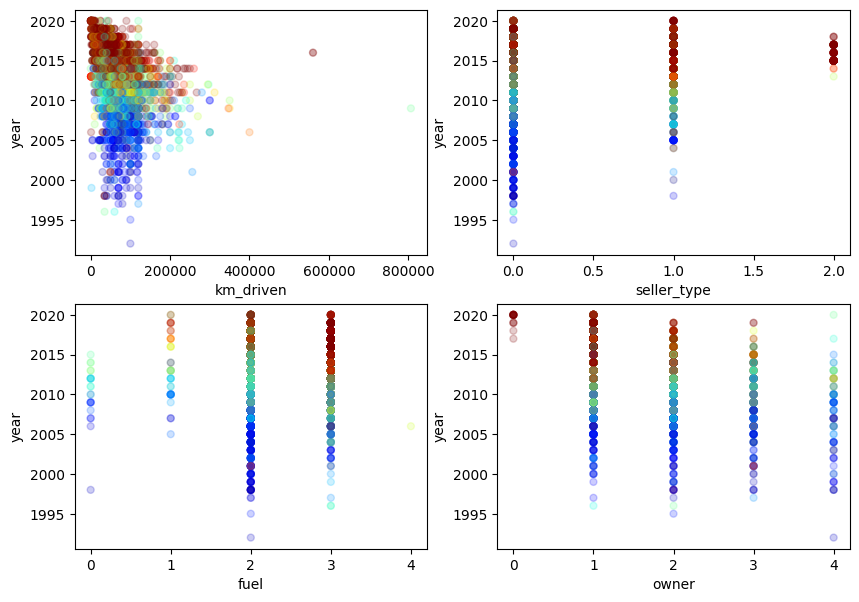

In [14]:
plot_data(['km_driven', 'fuel', 'seller_type', 'owner'], 'year')

In [15]:
corr_matrix = data.corr(numeric_only=True)
pd.DataFrame(corr_matrix["selling_price"].sort_values(ascending=False))

,selling_price
selling_price,1.000000
transmission,0.530205
year,0.413922
fuel,0.275786
seller_type,0.240666
km_driven,-0.192289
owner,-0.228091


In [16]:
train['selling_price']

1079     400000
2707     135000
2541      85000
2175    2050000
2623     400000
         ...   
2317     790000
2983     550000
3982     380000
26       585000
1422     675000
Name: selling_price, Length: 3472, dtype: int64

In [17]:
train[['fuel', 'seller_type', 'transmission', 'owner']] = encoder.fit_transform(train[['fuel', 'seller_type', 'transmission', 'owner']])
X = scaler.fit_transform(train.drop('selling_price', axis=1))
y = np.array(train['selling_price']).reshape(-1, 1)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=69)

In [120]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=77,max_depth=9, max_features=2)

param_grid = {'n_estimators': [77], 'max_depth': [9], 'max_features':[2]}

iters = 50
cv = 10

model = GridSearchCV(estimator, param_grid, cv=cv, scoring='neg_mean_squared_error')
model.fit(X_train, y_train.reshape(len(y_train),))

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=9, max_features=2,
                                             n_estimators=77),
             param_grid={'n_estimators': [71, 72, 73, 74, 75, 76, 77, 78]},
             scoring='neg_mean_squared_error')

In [116]:
model.best_estimator_

RandomForestRegressor(max_depth=9, max_features=2, n_estimators=77)

In [117]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195155,0.048095,0.010728,0.006661,71,{'n_estimators': 71},-3.458104e+11,-6.302272e+10,-5.035020e+10,-1.119595e+11,-1.157403e+11,-4.742932e+10,-5.654700e+10,-7.711517e+10,-1.161330e+11,-6.928239e+10,-1.053390e+11,8.410725e+10,2
1,0.186649,0.011719,0.009465,0.000854,72,{'n_estimators': 72},-3.457481e+11,-6.416356e+10,-4.842677e+10,-1.138080e+11,-1.095245e+11,-4.867322e+10,-5.659928e+10,-8.084346e+10,-1.127357e+11,-7.623000e+10,-1.056753e+11,8.361083e+10,3
2,0.175353,0.004319,0.009086,0.000594,73,{'n_estimators': 73},-3.505022e+11,-6.517483e+10,-4.952078e+10,-1.210957e+11,-1.164937e+11,-4.494920e+10,-5.185072e+10,-7.784168e+10,-1.198065e+11,-7.491520e+10,-1.072150e+11,8.577312e+10,7
3,0.184535,0.002037,0.009280,0.000637,74,{'n_estimators': 74},-3.493135e+11,-6.281968e+10,-4.859521e+10,-1.163695e+11,-1.073743e+11,-4.703866e+10,-5.935079e+10,-8.681928e+10,-1.105856e+11,-7.375337e+10,-1.062020e+11,8.458823e+10,4
4,0.185214,0.004532,0.009528,0.000669,75,{'n_estimators': 75},-3.436331e+11,-6.298198e+10,-4.765264e+10,-1.124780e+11,-1.123347e+11,-4.676737e+10,-5.870206e+10,-7.722225e+10,-1.241584e+11,-7.938236e+10,-1.065313e+11,8.331610e+10,5
5,0.205204,0.033265,0.010390,0.002329,76,{'n_estimators': 76},-3.438079e+11,-6.386487e+10,-4.984401e+10,-1.215781e+11,-1.102290e+11,-4.709416e+10,-5.824107e+10,-8.325807e+10,-1.158666e+11,-7.283891e+10,-1.066623e+11,8.318814e+10,6
6,0.193234,0.037574,0.009501,0.001398,77,{'n_estimators': 77},-3.440524e+11,-6.247803e+10,-4.747929e+10,-1.082365e+11,-1.102369e+11,-4.486475e+10,-5.403673e+10,-7.906604e+10,-1.220683e+11,-7.327831e+10,-1.045797e+11,8.395391e+10,1
7,0.182711,0.001927,0.009704,0.000347,78,{'n_estimators': 78},-3.507545e+11,-6.637086e+10,-5.228022e+10,-1.135735e+11,-1.166225e+11,-5.258812e+10,-5.413130e+10,-7.488480e+10,-1.209357e+11,-7.154519e+10,-1.073687e+11,8.510821e+10,8


In [118]:
def plot_cv_results(results, param):
    plt.plot(results[param], results['mean_test_score'], c='red')
    plt.xlabel(param)
    plt.ylabel('mean_test_score')
    plt.show()

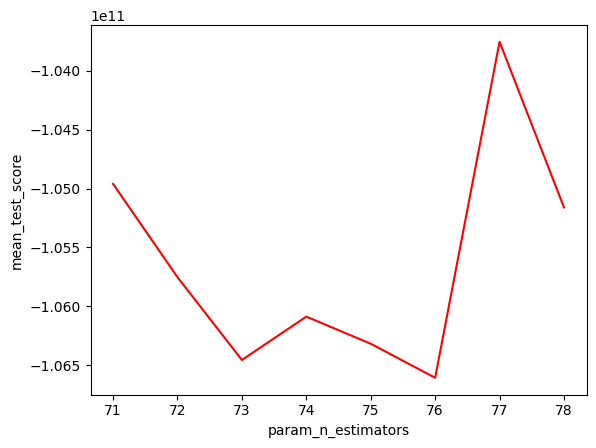

In [121]:
plot_cv_results(model.cv_results_, 'param_n_estimators')

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
linear.fit(X_train, y_train)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

/tmp/ipykernel_5751/3680724346.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [125]:
from sklearn.metrics import mean_squared_error

sample_idx = 115

y_pred_linear = linear.predict([X_valid[sample_idx]])
linear_mse = mean_squared_error(y_valid[sample_idx], y_pred_linear)
linear_rmse = np.sqrt(linear_mse)

y_pred_forest = forest.predict([X_valid[sample_idx]])
forest_mse = mean_squared_error(y_valid[sample_idx], y_pred_forest)
forest_rmse = np.sqrt(forest_mse)

linear_rmse, forest_rmse

(551483.1137158675, 71400.0)

In [126]:
y_pred_linear, y_pred_forest, y_valid[sample_idx]

(array([[1301483.11371587]]), array([821400.]), array([750000]))

In [173]:
X_train.shape

(2777, 6)

In [175]:
from keras.models import Sequential
from keras.layers import Dense

X_train.reshape(2777,6,1)

model = Sequential([
    LSTM(100, activation='relu', input_shape=(6,1)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

In [176]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
87/87 [==============================] - 4s 16ms/step - loss: 477035757568.0000 - val_loss: 329824108544.0000
Epoch 2/20
87/87 [==============================] - 1s 10ms/step - loss: 257629044736.0000 - val_loss: 273620271104.0000
Epoch 3/20
87/87 [==============================] - 1s 10ms/step - loss: 244195098624.0000 - val_loss: 273653940224.0000
Epoch 4/20
87/87 [==============================] - 1s 11ms/step - loss: 241771806720.0000 - val_loss: 268121325568.0000
Epoch 5/20
87/87 [==============================] - 1s 11ms/step - loss: 241286086656.0000 - val_loss: 267227496448.0000
Epoch 6/20
87/87 [==============================] - 1s 10ms/step - loss: 237605765120.0000 - val_loss: 266255630336.0000
Epoch 7/20
87/87 [==============================] - 1s 10ms/step - loss: 238128594944.0000 - val_loss: 265652682752.0000
Epoch 8/20
87/87 [==============================] - 1s 10ms/step - loss: 238112440320.0000 - val_loss: 265293971456.0000
Epoch 9/20
87/87 [==============

In [177]:
y_pred = model.predict(X_valid.reshape(695,6,1))

22/22 [==============================] - 0s 4ms/step


In [178]:
X_valid[sample_idx]

array([ 0.7021665 , -0.47518189, -0.87802471,  1.46391143,  3.00577479,
       -0.63338357])

In [179]:
y_valid[sample_idx], y_pred[sample_idx]

(array([750000]), array([648646.75], dtype=float32))

In [183]:
nn_mse = mean_squared_error(y_valid, y_pred)
nn_rmse = np.sqrt(nn_mse)
nn_rmse, linear_rmse, forest_rmse

(501809.13742046256, 551483.1137158675, 71400.0)